### <font color = "red">Polynomial Linear Regression</font>


**📈 Polynomial Regression**

**🔍 What is Polynomial Regression?**

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable `x` and the dependent variable `y` is modeled as an **nth-degree polynomial**.

It is a **non-linear** regression technique but can still be solved using the **linear regression framework** by transforming features.



**📌 When to Use?**

- When the data shows a **curved (non-linear)** trend.
- Linear regression underfits the data.
- Want to capture the **interaction and curvature** between variables.

**🧠 Polynomial Equation**

The general form of an nth-degree polynomial regression is:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n + \varepsilon
$$

- $ \beta_0, \beta_1, ..., \beta_n $ are the parameters (coefficients).
- $ x $ is the input feature.
- $ \varepsilon $ is the error term (noise).

**📘 Mathematical Derivation**

Let’s say we are doing a **second-degree polynomial regression**:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$

Suppose we have data points:  
$$
(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(m)}, y^{(m)})
$$

We define a **design matrix X** with polynomial features:

$$
X = 
\begin{bmatrix}
1 & x^{(1)} & (x^{(1)})^2 \\
1 & x^{(2)} & (x^{(2)})^2 \\
\vdots & \vdots & \vdots \\
1 & x^{(m)} & (x^{(m)})^2 \\
\end{bmatrix}
\quad\text{and}\quad
\boldsymbol{\beta} = 
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix}
\quad\text{and}\quad
\boldsymbol{y} = 
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
$$

Then, the hypothesis function becomes:

$$
\hat{y} = X \cdot \boldsymbol{\beta}
$$

To find the optimal $ \boldsymbol{\beta} $, we minimize the cost function:

$$
J(\boldsymbol{\beta}) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

The closed-form solution is:

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$



**🧠 How Polynomial Regression Works**

1. **Feature Expansion**:

   * Convert `x` into `[x, x², x³, ..., xⁿ]`
   * This allows linear regression to capture non-linear relationships.

2. **Linear Learning**:

   * Even though the model is non-linear in `x`, it's **linear in the parameters** $\beta$, so we use the same optimization techniques.

3. **Overfitting Risk**:

   * Higher degree polynomials can fit training data very well but may **overfit** (memorize rather than generalize).



**✅ Summary**

* Polynomial Regression fits a curve through data using polynomial features.
* It **extends Linear Regression** by transforming the original features.
* Use with care: **too high degree = overfitting**, **too low = underfitting**.




**🧠 Model Equation (Degree = 2)**

$$
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2
$$


**✍️ Example Dataset**

| x | y  |
|---|----|
| 1 | 2  |
| 2 | 5  |
| 3 | 10 |
| 4 | 17 |
| 5 | 26 |

This follows a quadratic pattern:  
$$
y \approx x^2 + 1
$$



**⚙️ How It Works**

1. Transform feature `x` into `[x, x², x³, ...]`
2. Use **linear regression** on the new features
3. Fit curve instead of straight line


**✅ Output Equation**

After training, the model may learn:

$$
\hat{y} = 1.0 + 0.0x + 1.0x^2 \quad \Rightarrow \quad \hat{y} = x^2 + 1
$$



### Codeing of Polynomial Regression

In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

In [55]:
x = 6 * np.random.rand(100,1) - 3
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(100,1)

[]

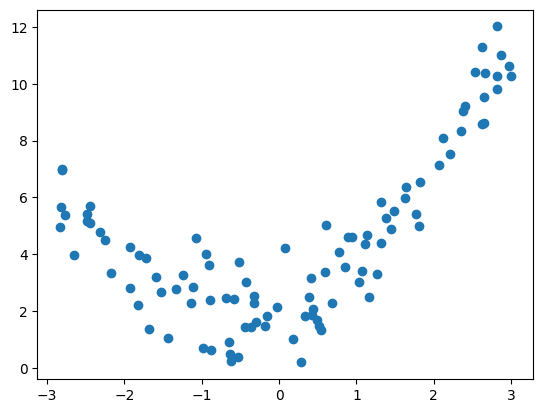

In [56]:
plt.scatter(x,y)
plt.plot()

We Can See that this is non-Linear Data and Now there we use polynomial Regression But before That i use linear regression and find out r2-score

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

In [58]:
lr = LinearRegression()
lr

LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(x_test)
y_pred

array([[1.81206317],
       [4.80179786],
       [4.78949286],
       [6.54379095],
       [6.99585447],
       [3.35316752],
       [4.62674732],
       [6.93907104],
       [2.03260537],
       [3.58300435],
       [2.7367914 ],
       [5.03628615],
       [5.12821566],
       [2.46678315],
       [5.25855705],
       [5.31075654],
       [6.77601474],
       [1.49545403],
       [3.79728105],
       [3.01340306]])

In [61]:
r2_score(y_test,y_pred)

0.27412582824459475

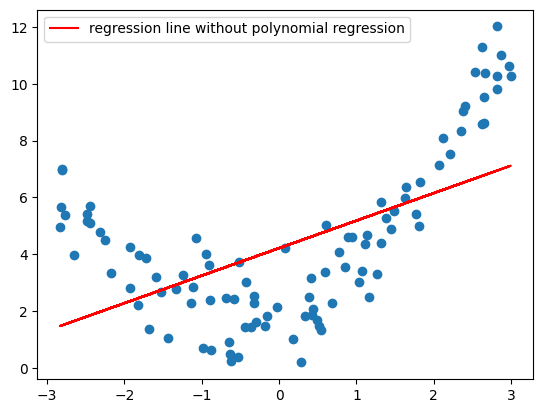

In [62]:
plt.scatter(x,y)
plt.plot(x_train,lr.predict(x_train),color ="red",label = "regression line without polynomial regression")
plt.legend()
plt.show()

Polynomial Regression Start from Here

In [63]:
poly_f=PolynomialFeatures(degree=2)
x_train_tranformed = poly_f.fit_transform(x_train)
x_test_tranformed = poly_f.transform(x_test)

To understand difference between fit_transform() and Transform go to last of this notebook

In [64]:
print(x_train[0],x_test_tranformed[0],sep="\n")


[0.43742285]
[ 1.         -2.48222687  6.16145025]


In [65]:
lr.fit(x_train_tranformed,y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(x_test_tranformed)
r2_score(y_test,y_pred)

0.9109069510242332

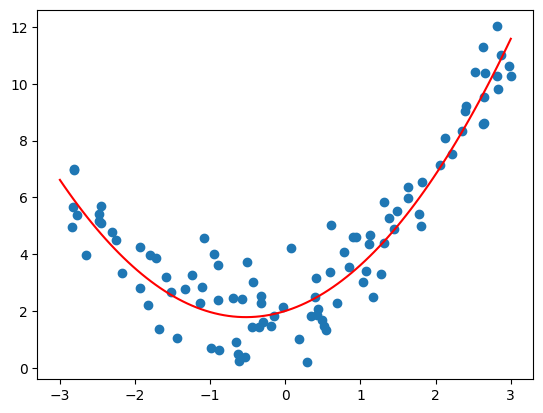

In [68]:
plt.scatter(x,y)
x_sorted = np.linspace(-3,3,100).reshape(-1,1)
y_sorted = lr.predict(poly_f.transform(x_sorted))
plt.plot(x_sorted,y_sorted,color = "Red")
#Why x_sorted and y_sorted came in picture goto end of notebook



### Difference Between fit_transform() and transform()

---

### 🔢 Code Recap:

```python
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)  # ✅ step 1
X_test_trans = poly.transform(X_test)        # ✅ step 2
```

---

## 🎯 What’s the difference?

### ✅ 1. `fit_transform(X_train)`

This does **two things**:

1. **`fit(X_train)`** → Learns how to expand features from `X_train`

   * For example: if `X_train` has 2 features and `degree=2`, it figures out how to create terms like $x_1^2, x_1x_2, x_2^2$, etc.
   * **It learns the structure** of the transformation based on the input.

2. **`transform(X_train)`** → Actually **applies the transformation** to `X_train`

So it’s like:

```python
poly.fit(X_train)      # Learn the transformation
X_train_trans = poly.transform(X_train)  # Apply it to training data
```

But for convenience, we use:

```python
poly.fit_transform(X_train)
```

---

### ✅ 2. `transform(X_test)`

This just **applies the already learned transformation** to new/unseen data like `X_test`.

> It does **not learn anything new** from the test data. It just uses what was fitted on training data.

---

## ⚠️ Why this separation is important?

### Because you **must never learn anything from the test data** during training!

That would be **data leakage** and ruin the integrity of your model evaluation.

So, the correct pattern is always:

```python
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)  # Learn from training
X_test_trans = poly.transform(X_test)        # Apply only what you learned
```

---

### 🔄 Quick Analogy:

Think of `fit_transform()` like designing and tailoring a suit using your own measurements (training set).

Then `transform()` is just using that same suit design and applying it to someone else (test set) — **no new measurements are taken.**

---

Let me know if you want me to show what exactly happens inside with a concrete numeric example. It’ll be fun!


## Why x_sorted and Y_sorted came in ficture in polynomial regressing ploting

## ✅ 🔁 **Summary: Why Polynomial Regression Plot Looks Zig-Zag (and How to Fix It)**

### 💥 **The Problem**

```python
plt.plot(x_train, model.predict(x_train_transformed))
```

* This draws a **zig-zag or broken curve** ❌ even though the predictions are correct.

### 🎯 **Why it Happens**

* `x_train` is **not sorted** (because of train-test split).
* `plt.plot(x, y)` **connects points in array order**, not based on increasing x-values.
* In **polynomial regression**, predictions curve non-linearly.
* So unsorted x-values lead to **random jumps in the line** (zig-zag).

---

### ⚙️ **Why it Doesn’t Happen in Linear Regression**

```python
plt.plot(x_train, model.predict(x_train))
```

* Still uses unsorted x, but the output is a straight line.
* So even with jumps in x, the line appears visually correct.
* It's actually zig-zag too — but all points lie on a straight path → so we **don't notice**.

---

### ✅ **How to Fix It (2 Ways)**

#### ✅ **Option 1: Sort x\_train before plotting**

```python
sorted_idx = np.argsort(x_train.ravel())
x_sorted = x_train[sorted_idx]
y_sorted = y_pred[sorted_idx]
plt.plot(x_sorted, y_sorted)
```

#### ✅ **Option 2: Use smooth evenly spaced x values**

```python
x_curve = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
x_curve_trans = poly.transform(x_curve)
y_curve = model.predict(x_curve_trans)
plt.plot(x_curve, y_curve)
```

---

### 🧠 **Key Takeaways**

| Concept                     | What You Should Remember                                            |
| --------------------------- | ------------------------------------------------------------------- |
| `plt.plot(x, y)`            | Connects points in the **order of array**, not by x's actual values |
| Polynomial regression curve | Will look broken unless `x` is **sorted or smoothed**               |
| Linear regression           | Line appears fine even if x is not sorted (but technically zig-zag) |
| Best practice               | Always use sorted or evenly spaced x for plotting regression lines  |

---

### 📝 Tip:

> **Always sort x-values or use `np.linspace()` when plotting regression lines, especially for polynomial regression.**

Save this summary in your Markdown notes for later. Want me to give you this as a markdown cell ready to paste?
